In [ ]:
import os
%load_ext autoreload

## Setup environment specific requirements and set paths. This is to accommodate
## running from Google Colab or from a local directory

if( os.path.isdir("/content") ):
  # Setup Specific to Google Colab Environment
 
  print("Running from Google Colab Environment")
                  
  !pip install requests
  !pip install requests-oauthlib
  !pip install ratelimit
  
  from google.colab import drive
  drive.mount('/content/drive')
      
  %cd "/content/drive/My Drive/data"

  sourceDirectory = %pwd
  sourceDirectory = sourceDirectory + "/"
  executionEnvDirectory = '/content'
  
else:
  # Setup Specific to Local Jupyter Environment
  
  print('Running from Local Jupyter Environment')
 
  sourceDirectory = "./"
  executionEnvDirectory = "./"


from pprint import pprint
import json
from datetime import datetime
import random
from os import listdir
from os.path import isfile, join

random_seed = 42
random.seed(random_seed) 

processStartTime = datetime.today().strftime('%Y-%m-%d-%H:%M:%S')

Running from Google Colab Environment
  Created wheel for ratelimit: filename=ratelimit-2.2.1-py3-none-any.whl size=5909 sha256=a7fd22294c34f64e0ab43ee978338e952a7cfaa8910288a2ddc2e4598cb4e1bf
  Stored in directory: /root/.cache/pip/wheels/5d/c2/23/4915cca200175fece0d5015f1981f4e1ecb5e3ef40b66cf525
Successfully built ratelimit
Mounted at /content/drive
/content/drive/My Drive/COMP6125/Lab Exercise 2


In [ ]:
import pandas as pd
pd.set_option('max_colwidth', 500)      

#Install and import HuggingFace Transformers
!pip install transformers
import transformers as t

#Load a model

import tensorflow as tf

from transformers import AutoTokenizer, AutoModelForSequenceClassification

     |████████████████████████████████| 3.4 MB 8.9 MB/s 
     |████████████████████████████████| 61 kB 474 kB/s 
     |████████████████████████████████| 596 kB 47.1 MB/s 
     |████████████████████████████████| 3.3 MB 47.4 MB/s 
     |████████████████████████████████| 895 kB 53.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
%aimport helpers
from helpers import *

helperUtils = Utilities()

*** (Re)importing helpers.py ***
External Utilities Loaded and Initialized


In [ ]:
!ls data


'subsetForGoldLabelling (10).xlsx'  'subsetForGoldLabelling (26).xlsx'
'subsetForGoldLabelling (11).xlsx'  'subsetForGoldLabelling (27).xlsx'
'subsetForGoldLabelling (12).xlsx'  'subsetForGoldLabelling (28).xlsx'
'subsetForGoldLabelling (13).xlsx'  'subsetForGoldLabelling (29).xlsx'
'subsetForGoldLabelling (14).xlsx'  'subsetForGoldLabelling (2).xlsx'
'subsetForGoldLabelling (15).xlsx'  'subsetForGoldLabelling (30).xlsx'
'subsetForGoldLabelling (16).xlsx'  'subsetForGoldLabelling (31).xlsx'
'subsetForGoldLabelling (17).xlsx'  'subsetForGoldLabelling (3).xlsx'
'subsetForGoldLabelling (18).xlsx'  'subsetForGoldLabelling (4).xlsx'
'subsetForGoldLabelling (19).xlsx'  'subsetForGoldLabelling (5).xlsx'
'subsetForGoldLabelling (20).xlsx'  'subsetForGoldLabelling (6).xlsx'
'subsetForGoldLabelling (21).xlsx'  'subsetForGoldLabelling (7).xlsx'
'subsetForGoldLabelling (22).xlsx'  'subsetForGoldLabelling (8).xlsx'
'subsetForGoldLabelling (23).xlsx'  'subsetForGoldLabelling (9).xlsx'
'subsetForGold

In [ ]:
sourceDataFilesPath = './data/training_data'

onlyfiles = [f for f in listdir(sourceDataFilesPath) if isfile(join(sourceDataFilesPath, f))]
onlyfiles

['subsetForGoldLabelling (8).xlsx',
 'subsetForGoldLabelling (6).xlsx',
 'subsetForGoldLabelling (18).xlsx',
 'subsetForGoldLabelling (27).xlsx',
 'subsetForGoldLabelling (16).xlsx',
 'subsetForGoldLabelling (30).xlsx',
 'subsetForGoldLabelling (21).xlsx',
 'subsetForGoldLabelling (19).xlsx',
 'subsetForGoldLabelling (31).xlsx',
 'subsetForGoldLabelling (24).xlsx',
 'subsetForGoldLabelling (20).xlsx',
 'subsetForGoldLabelling (12).xlsx',
 'subsetForGoldLabelling (26).xlsx',
 'subsetForGoldLabelling (11).xlsx',
 'subsetForGoldLabelling (29).xlsx',
 'subsetForGoldLabelling (14).xlsx',
 'subsetForGoldLabelling (17).xlsx',
 'subsetForGoldLabelling (13).xlsx',
 'subsetForGoldLabelling (15).xlsx',
 'subsetForGoldLabelling.xlsx',
 'subsetForGoldLabelling (22).xlsx',
 'subsetForGoldLabelling (25).xlsx',
 'subsetForGoldLabelling (28).xlsx',
 'subsetForGoldLabelling (4).xlsx',
 'subsetForGoldLabelling (7).xlsx',
 'subsetForGoldLabelling (23).xlsx',
 'subsetForGoldLabelling (9).xlsx',
 'subsetFor

In [ ]:
dfs = []

for fileName in onlyfiles:
  dfs.append(pd.read_excel('data/training_data/' + fileName))

In [ ]:
dfs[0].head()

,Unnamed: 0,Tweet ID,Text,GoldSentiment
0,17511,1296935334232629249,"when election come n gone me a bet any money seh jamaica ago lock down back completely ,cause the level a corona weh ago deh ya na go normal",n
1,17347,1297050127585161216,Me still cya believe elections a keep at the peek of a pandemic. Stupid dash weh pon Jamaica and d ppl dem soak it up.,n
2,37354,1299892861996077057,"Anju basically a seh ... ""afta dem pass grade 4 me nuh know wha happen tpc""\n\n#jamaicadebates2020",n
3,3406,1299178299407716352,nigel look like one a dem youth deh weh usually lead devotion #jamaicadebates2020,p
4,37947,1299890737287507969,Peter it’s tooo early for this !!! How it look like yuh nuh know Weh yuh waah seh suh? \n\n#jamaicadebates2020,n


In [ ]:
for df in dfs:
  print(df.columns)

Index(['Unnamed: 0', 'Tweet ID', 'Text', 'GoldSentiment'], dtype='object')
Index(['Unnamed: 0', 'Tweet ID', 'Text', 'GoldSentiment'], dtype='object')
Index(['Unnamed: 0', 'Tweet ID', 'Text', 'GoldSentiment'], dtype='object')
Index(['Unnamed: 0', 'Tweet ID', 'Text', 'GoldSentiment'], dtype='object')
Index(['Unnamed: 0', 'Tweet ID', 'Text', 'GoldSentiment'], dtype='object')
Index(['Unnamed: 0', 'Tweet ID', 'Text', 'GoldSentiment'], dtype='object')
Index(['Unnamed: 0', 'Tweet ID', 'Text', 'GoldSentiment'], dtype='object')
Index(['Unnamed: 0', 'Tweet ID', 'Text', 'GoldSentiment'], dtype='object')
Index(['Unnamed: 0', 'Tweet ID', 'Text', 'GoldSentiment'], dtype='object')
Index(['Unnamed: 0', 'Tweet ID', 'Text', 'GoldSentiment'], dtype='object')
Index(['Unnamed: 0', 'Tweet ID', 'Text', 'GoldSentiment'], dtype='object')
Index(['Unnamed: 0', 'Tweet ID', 'Text', 'GoldSentiment'], dtype='object')
Index(['Unnamed: 0', 'Tweet ID', 'Text', 'GoldSentiment'], dtype='object')
Index(['Unnamed: 0', 'Twe

In [ ]:
dfs[20].columns

Index(['Unnamed: 0', 'TAG', 'Tweet ID', 'Text', 'GoldSentiment'], dtype='object')

In [ ]:
dfs[20]['GoldSentiment'] = dfs[20]['TAG']

dfs[20].drop('TAG', axis=1, inplace=True)

dfs[20].head()

,Unnamed: 0,Tweet ID,Text,GoldSentiment
0,19664,1301839102648737793,@JodianMyrie Can't have a head and it not naah wrk that mean yh mad. Dem ear a ring out with the 🔔🔔🔔🔔🔔 dem. for my first time voting am happy with my self Showaaaa 💚💚💚✌✌✌✌keep up the good work @jlpjamaica action do that @EastPortand 💚💚💚✌💚🔔🔔🔔🔔✌wi sweep dem out clean,p
1,16183,1297735392729464832,Elections really have people carrying on bad in Jamaica still. U know mi nah feel sorry if dem ketch covid and start drop dead tho. People must have sense.,n
2,3944,1299175308860559360,"No sah, @NigelClarkeJa seems like him ago tek weh da #BroGad title from @AndrewHolnessJM. Nigel already dominating the debate!!!\n#JamaicaDecides\n#JAVotes2020 \n#JADebates2020",p
3,3752,1299176184778031104,"@RushCam Legit tweeted something like this, an mi nuh tink mi inna Di 10%\n\n#JamaicaDebates2020",-'
4,21812,1301701604710789120,Posted with dittorepost • @Sparkiebaby\n\nThe deciding voter! 😂\n \ntherealdjruxie_cdfantasy fi hate yuh fi dis \n#JaVotes2020 https://t.co/eCIEoCoE0t,-'


In [ ]:
dfs[20]['GoldSentiment'] = dfs[20]['GoldSentiment'].apply(lambda cell: '-' if cell == "-'" else cell )
dfs[20].head()


,Unnamed: 0,Tweet ID,Text,GoldSentiment
0,19664,1301839102648737793,@JodianMyrie Can't have a head and it not naah wrk that mean yh mad. Dem ear a ring out with the 🔔🔔🔔🔔🔔 dem. for my first time voting am happy with my self Showaaaa 💚💚💚✌✌✌✌keep up the good work @jlpjamaica action do that @EastPortand 💚💚💚✌💚🔔🔔🔔🔔✌wi sweep dem out clean,p
1,16183,1297735392729464832,Elections really have people carrying on bad in Jamaica still. U know mi nah feel sorry if dem ketch covid and start drop dead tho. People must have sense.,n
2,3944,1299175308860559360,"No sah, @NigelClarkeJa seems like him ago tek weh da #BroGad title from @AndrewHolnessJM. Nigel already dominating the debate!!!\n#JamaicaDecides\n#JAVotes2020 \n#JADebates2020",p
3,3752,1299176184778031104,"@RushCam Legit tweeted something like this, an mi nuh tink mi inna Di 10%\n\n#JamaicaDebates2020",-
4,21812,1301701604710789120,Posted with dittorepost • @Sparkiebaby\n\nThe deciding voter! 😂\n \ntherealdjruxie_cdfantasy fi hate yuh fi dis \n#JaVotes2020 https://t.co/eCIEoCoE0t,-


In [ ]:
allData = pd.concat(dfs)
allData.sample(5)

,Unnamed: 0,Tweet ID,Text,GoldSentiment
20,16119,1297761670585090048,@JamaicaGleaner @KhiaJosina @JamaicaPNP @RaymondPryce1 @JamaicaConstab Mi comrade..you mek mi laugh..Ja no problem 🇯🇲😂😂,p
55,6825,1298953607002361862,@SweetMusicManCS @stbessgirl @JamaicaPNP @NestaJA @YaadMekI Lol What will happen to our bills when they cannot or are late in paying over these 30 odd billion to JPS?,-
84,22786,1301692540559728640,Bet when JLP win somebody gonna talk bout them buy out the election 🤦🏾‍♂️🤦🏾‍♂️🤦🏾‍♂️\n#JaVotes2020 #JamaicaVotes2020,n
23,16216,1297710867363123201,"Dear Mr. PM @AndrewHolnessJM , please postpone #elections. It would be in your favour to see you handle this upsurge as you did in March. Host campaigns virtually where your voters really are - like the Dem Convention. Stop the parades. Please. #JAVotes2020 #Jamaica",-
79,6182,1299153093238689795,@JamaicaPNP can you please tell me what purpose Fenton Ferguson serves over in St. Thomas Western,n


In [ ]:
allData.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       3100 non-null   int64 
 1   Text           3100 non-null   object
 2   GoldSentiment  2934 non-null   object
dtypes: int64(1), object(2)
memory usage: 96.9+ KB


In [ ]:
allData = allData.astype({'Tweet ID': 'str', 'Text': 'str', 'GoldSentiment': 'category'})
allData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Tweet ID       3100 non-null   object  
 1   Text           3100 non-null   object  
 2   GoldSentiment  2934 non-null   category
dtypes: category(1), object(2)
memory usage: 75.9+ KB


In [ ]:
allData.describe(include = ['object', 'int', 'category'])

,Tweet ID,Text,GoldSentiment
count,3100,3100,2934
unique,2633,2632,6
top,1299170799299985408,"A which internet Golding a use? Cause him a move slow bad, Words Dem nah download fast enough. #jamaicadebates2020",n
freq,5,5,1211


In [ ]:
import numpy as np

np.random.seed(42)

In [ ]:
allData['GoldSentiment'].unique()


['n', 'p', '-', NaN, 0, 'P', ' n']
Categories (6, object): ['n', 'p', '-', 0, 'P', ' n']

In [ ]:
def correctCategories(cell):
  if cell == 'P':
    return 'p'
  elif cell == ' n':
    return 'n'
  else:
    return cell

allData['GoldSentiment'] = allData['GoldSentiment'].apply(correctCategories)

In [ ]:
allData.loc[ (allData['GoldSentiment'] != 'p') & (allData['GoldSentiment'] != 'n') & (allData['GoldSentiment'] != '-') ].sample(5)

,Tweet ID,Text,GoldSentiment
43,1298345543891001344,@jlpjamaica #JamaicaVote2020: Suh nuhbadi else from di party cuddn't feature ina di manifesto? Like seriously @MalahooForteQC @matthewsamuda @NestaJA @RhodaMCrawford @karijdouglas #TalkTheTruth,NaN
50,1301076309146300416,"No amount of tricks, no amount of propaganda no amount of hot-air promises seat by seat vote to BUILD JAMAICA STRONGER. We are very ambitious people, for this reason PNP Administration will remain in opposition for the unforeseeable future_ They know NOTHING ABOUT DEVELOPMENT.",NaN
20,1297431167575171075,@Kevinfr25919026 @CVMTV @AndrewHolnessJM @JamaicaPNP I could never have hate in my heart for an old person ‼️‼️🤦🏽‍♀️That’s what you should know if you had love for old people you would be saying something about that sick man😒......now if you don’t have anything better to come at me about don’t ova wah suh🤦🏽‍♀️💚✌🏽,NaN
98,1301689624411230212,A lot of young women for Parliament. We love to see it 🙌🏾✨ #JaVotes2020,NaN
40,1302001436725784577,"@miplayrough @jaevionn @JamaicaPNP Yuh sound troubled. \n\nElection results got you depressed? It's OK, you can call 888-692-9355 to seek professional help.",NaN


In [ ]:
allData['GoldSentiment'].unique()

array(['n', 'p', '-', nan, 0], dtype=object)

In [ ]:
allData = allData[~((allData['GoldSentiment'] != 'p') & (allData['GoldSentiment'] != 'n') & (allData['GoldSentiment'] != '-'))]
allData.reset_index(inplace = True, drop=True)


In [ ]:
allData.describe()

,Tweet ID,Text,GoldSentiment
count,2933,2933,2933
unique,2572,2571,3
top,1299170799299985408,"A which internet Golding a use? Cause him a move slow bad, Words Dem nah download fast enough. #jamaicadebates2020",n
freq,5,5,1213


In [ ]:
allData

,Tweet ID,Text,GoldSentiment
0,1296935334232629249,"when election come n gone me a bet any money seh jamaica ago lock down back completely ,cause the level a corona weh ago deh ya na go normal",n
1,1297050127585161216,Me still cya believe elections a keep at the peek of a pandemic. Stupid dash weh pon Jamaica and d ppl dem soak it up.,n
2,1299892861996077057,"Anju basically a seh ... ""afta dem pass grade 4 me nuh know wha happen tpc""\n\n#jamaicadebates2020",n
3,1299178299407716352,nigel look like one a dem youth deh weh usually lead devotion #jamaicadebates2020,p
4,1299890737287507969,Peter it’s tooo early for this !!! How it look like yuh nuh know Weh yuh waah seh suh? \n\n#jamaicadebates2020,n
...,...,...,...
2928,1299908626375639042,Who y’all think I’m voting for? Honestly curious lol,-
2929,1299910696281477120,52 years to claaat #jamaicadebates2020,n
2930,1301746497416048641,"What can I say, I am pleased with the outcome of the elections but the citizens of Jamaica will need to keep a firm hand over the GoJ now that the oppositions power is weakened.",p
2931,1299901580637016064,It look like Dionne did a look Andrew n him turn har down \n#jamaicadebates2020,n


In [ ]:
uniqueOnlyDf = allData[ ~allData.duplicated(subset='Tweet ID', keep=False) ]

uniqueOnlyDf.describe()

,Tweet ID,Text,GoldSentiment
count,2249,2249,2249
unique,2249,2248,3
top,1299175259229298689,@marxshields @JamaicaPNP Julian,n
freq,1,2,888


In [ ]:
nonUnique = allData[ allData.duplicated(subset='Tweet ID', keep=False) ]

In [ ]:
nonUnique = nonUnique.sort_values('Tweet ID')
nonUnique.head(6)

,Tweet ID,Text,GoldSentiment
895,1294768979005919239,"This is Zavia Mayne, your Jamaica Labour Party candidate for St. Ann South Western. #Stronger #BuildBackStronger #RecoveringStronger #WeAreResilient https://t.co/Rypur4u3UQ",p
845,1294768979005919239,"This is Zavia Mayne, your Jamaica Labour Party candidate for St. Ann South Western. #Stronger #BuildBackStronger #RecoveringStronger #WeAreResilient https://t.co/Rypur4u3UQ",p
582,1296900312280768514,It is wonderful to see the millenials getting SO involved in the political process these days but sascrise man it's disappoiting that unno jus as tribal as the dinosaurs enuh. You must have the ability to accept and point out deficiences in your own party too!,n
166,1296900312280768514,It is wonderful to see the millenials getting SO involved in the political process these days but sascrise man it's disappoiting that unno jus as tribal as the dinosaurs enuh. You must have the ability to accept and point out deficiences in your own party too!,p
921,1296982789615648769,@duttylaborite @KeishaMac6 @kizi_DIVA @LambertBrownJa @rovertsirrah @2Brushie @veneshatweets @MarkJGolding @PeterBuntingMP @JamaicaPNP Stop shouling for once nuh,n
871,1296982789615648769,@duttylaborite @KeishaMac6 @kizi_DIVA @LambertBrownJa @rovertsirrah @2Brushie @veneshatweets @MarkJGolding @PeterBuntingMP @JamaicaPNP Stop shouling for once nuh,n


In [ ]:
nonUnique.tail(6)

,Tweet ID,Text,GoldSentiment
2074,1303855235442585606,Yes! Hear it fram di people @JamaicaPNP \nGud fi unuh.😡\nCc. @televisionjam,-
281,1303855235442585606,Yes! Hear it fram di people @JamaicaPNP \nGud fi unuh.😡\nCc. @televisionjam,-
2096,1304102388979171330,Had no idea @JamaicaPNP was a private club and is excluded from outside opinions. Some of us do more harm to the party than good.,n
303,1304102388979171330,Had no idea @JamaicaPNP was a private club and is excluded from outside opinions. Some of us do more harm to the party than good.,n
892,1304374712412377088,@ThompsonCanute I agree with with a government is elected just under 20% of the eligible voters what does that mean for overall democracy with in Jamaica. 11% drop in one election is major drop and both parties need look this,n
842,1304374712412377088,@ThompsonCanute I agree with with a government is elected just under 20% of the eligible voters what does that mean for overall democracy with in Jamaica. 11% drop in one election is major drop and both parties need look this,n


In [ ]:
nonUnique.describe()

,Tweet ID,Text,GoldSentiment
count,684,684,684
unique,323,323,3
top,1299170799299985408,"A which internet Golding a use? Cause him a move slow bad, Words Dem nah download fast enough. #jamaicadebates2020",n
freq,5,5,325


In [ ]:
uniqueOnlyDf.describe()


,Tweet ID,Text,GoldSentiment
count,2249,2249,2249
unique,2249,2248,3
top,1299175259229298689,@marxshields @JamaicaPNP Julian,n
freq,1,2,888


In [ ]:
deduplicatedData = pd.concat( [ uniqueOnlyDf, nonUnique.drop_duplicates(subset="Tweet ID") ] )
deduplicatedData.describe()

,Tweet ID,Text,GoldSentiment
count,2572,2572,2572
unique,2572,2571,3
top,1298447289342664705,@marxshields @JamaicaPNP Julian,n
freq,1,2,1048


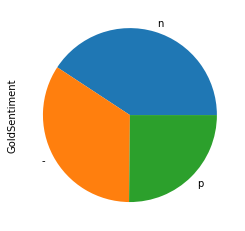

In [ ]:
deduplicatedData['GoldSentiment'].value_counts().plot(kind='pie')

In [ ]:
deduplicatedData['isPatois'] = False

In [ ]:

print('Using the following Patois keywords: ', helperUtils.getPatoisKeywords())

patoisTweetsDf = deduplicatedData.loc[ deduplicatedData["Text"].str.contains(helperUtils.getPatoisKeywordsRegex(), na=False, case=False) ]
patoisTweetsDf.shape

Using the following Patois keywords:  ['ah', 'ansah', 'bada', 'badda', 'bak', 'boi', 'bway', 'bwoy', 'cya', 'cyah', 'dan', 'dat', 'deh', 'dem', 'di', 'duh', 'dun', 'dung', 'enuh', 'fa', 'fah', 'fi', 'fren', 'gi', 'guh', 'gwaan', 'gweh', 'gyal', 'inna', 'inno', 'inuh', 'ketch', 'lawd', 'lef', 'leff', 'mek', 'memba', 'mi', 'mus', 'mussi', 'naah', 'nah', 'nah', 'neva', 'nuh', 'nyam', 'pon', 'seh', 'shi', 'smaddy', 'suh', 'tan', 'tek', 'tiad', 'tink', 'unuh', 'ute', 'wah', 'weh', 'weh', 'wey', 'wi', 'wid', 'yah', 'yu', 'yuh']


(1248, 4)

In [ ]:
deduplicatedData.loc[ deduplicatedData["Tweet ID"].isin(patoisTweetsDf["Tweet ID"]), "isPatois" ] = True

deduplicatedData.loc[ deduplicatedData['isPatois'] == True ].sample(2)

,Tweet ID,Text,GoldSentiment,isPatois
1848,1299173106150408192,Tvj yuh need fi do better #jamaicadebates2020,n,True
1754,1299903666384764933,If we being honest Phillips nah do bad at all #jamaicadebates2020,p,True


In [ ]:
deduplicatedData.loc[ deduplicatedData['isPatois'] == False ].sample(2)

,Tweet ID,Text,GoldSentiment,isPatois
2526,1301496582521708544,https://t.co/m1STmRa18I,-,False
2707,1299906853170806784,Yes indeed... #JADebates2020 https://t.co/zrqdTTdZA8,p,False


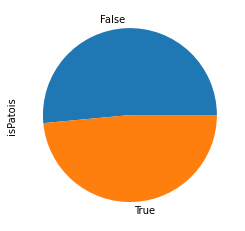

In [ ]:
deduplicatedData['isPatois'].value_counts().plot(kind='pie')

In [ ]:
exampleText1 = "Hello! I am your @PartyName candidate for St. Ann South Western. #Stronger #BuildBackStronger #RecoveringStronger #WeAreResilient https://t.co/Rypur4u3UQ"

print("cleanText1: ", helperUtils.cleanText1(exampleText1))
print("cleanText2: ", helperUtils.cleanText2(exampleText1))

cleanText1:  Hello! I am your @user candidate for St. Ann South Western. #Stronger #BuildBackStronger #RecoveringStronger #WeAreResilient http
cleanText2:  Hello! I am your  candidate for St. Ann South Western.     


## Train/Test


In [ ]:
from sklearn.model_selection import train_test_split

posOrNegDf = deduplicatedData[ (deduplicatedData['GoldSentiment'] == 'p') | (deduplicatedData['GoldSentiment'] == 'n') ]

train_texts, test_texts, train_labels, test_labels = train_test_split(posOrNegDf['Text'], posOrNegDf['GoldSentiment'].apply(lambda cell: 1 if cell == "p" else 0 ), test_size=.2, stratify=posOrNegDf['GoldSentiment'].apply(lambda cell: 1 if cell == "p" else 0 ), random_state=random_seed)
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=.1, stratify=train_labels, random_state=random_seed)


In [ ]:
allDataAfterTestTrainSplit = deduplicatedData.copy()

allDataAfterTestTrainSplit.loc[train_texts.index, 'Split'] = 'Train'
allDataAfterTestTrainSplit.loc[test_texts.index, 'Split'] = 'Test'
allDataAfterTestTrainSplit.loc[val_texts.index, 'Split'] = 'Validation'


(1220, 5)


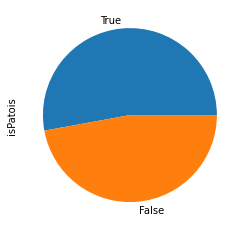

In [ ]:
allDataAfterTestTrainSplit.loc[ allDataAfterTestTrainSplit.Split == 'Train' ]['isPatois'].value_counts().plot(kind='pie')
print(allDataAfterTestTrainSplit.loc[ allDataAfterTestTrainSplit.Split == 'Train' ].shape)

(339, 5)


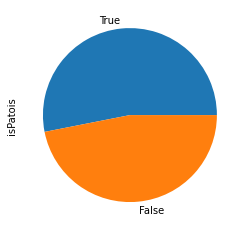

In [ ]:
allDataAfterTestTrainSplit.loc[ allDataAfterTestTrainSplit.Split == 'Test']['isPatois'].value_counts().plot(kind='pie')
print(allDataAfterTestTrainSplit.loc[ allDataAfterTestTrainSplit.Split == 'Test' ].shape)

(136, 5)


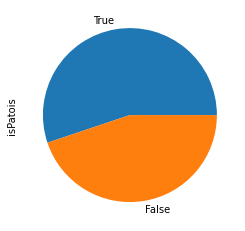

In [ ]:
allDataAfterTestTrainSplit.loc[ allDataAfterTestTrainSplit.Split == 'Validation']['isPatois'].value_counts().plot(kind='pie')
print(allDataAfterTestTrainSplit.loc[ allDataAfterTestTrainSplit.Split == 'Validation' ].shape)

In [ ]:
print(f'Number of Positive:Negative Labels in train_labels:: {train_labels.loc[ train_labels == 1 ].count()}:{train_labels.loc[ train_labels == 0 ].count()} ({ round(train_labels.loc[ train_labels == 0 ].count() / train_labels.shape[0] * 100) }% Negative)')
print(f'Number of Positive:Negative Labels in test_labels:: {test_labels.loc[ test_labels == 1 ].count()}:{test_labels.loc[ test_labels == 0 ].count()} ({ round(test_labels.loc[ test_labels == 0 ].count() / test_labels.shape[0] * 100) }% Negative)')
print(f'Number of Positive:Negative Labels in val_labels:: {val_labels.loc[ val_labels == 1 ].count()}:{val_labels.loc[ val_labels == 0 ].count()} ({ round(val_labels.loc[ val_labels == 0 ].count() / val_labels.shape[0] * 100) }% Negative)')

Number of Positive:Negative Labels in train_labels:: 466:754 (62% Negative)
Number of Positive:Negative Labels in test_labels:: 129:210 (62% Negative)
Number of Positive:Negative Labels in val_labels:: 52:84 (62% Negative)


## Classification
Setup Test/Train Data

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [ ]:
train_encodings = tokenizer(train_texts.apply(helperUtils.cleanText1).to_list(), truncation=True, padding=True)
val_encodings = tokenizer(val_texts.apply(helperUtils.cleanText1).to_list(), truncation=True, padding=True)
test_encodings = tokenizer(test_texts.apply(helperUtils.cleanText1).to_list(), truncation=True, padding=True)

In [ ]:


train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_labels
))


## Pretrained Model

### Evaluation

In [ ]:
modelAsIs = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

nlpPipelineAsIs = t.pipeline("sentiment-analysis", tokenizer=tokenizer, model=modelAsIs)

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

### Evaluate: Using Examples

In [ ]:
testText1 = "Andrew. No. No. No. #jamaicadebates2020	"
testText2 = "Congratulations Andrew Holness &amp; his JLP on the election victory. May God's mercy and grace be upon your leadership as you embark on a journey to deliver exceptional results for the loving nation of Jamaica."

result = nlpPipelineAsIs(testText1)[0]
print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

result = nlpPipelineAsIs(testText2)[0]
print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

label: NEGATIVE, with score: 0.9032
label: POSITIVE, with score: 0.9998


In [ ]:
text = 'How effective was Dr. The Hon. @Nigel Clarke’s opening statement ? \n\nParticipate in LIVE polling of the debate, powered by our digital partner @Queritel.\n\nVOTE HERE: https://t.co/uWbaD7Rapy\n\n#JamaicaDebates2020 #JamaicaDecides #JaDecides2020'
encoded_input = tokenizer(helperUtils.cleanText1(text), return_tensors='pt')


print(tokenizer.tokenize(helperUtils.cleanText1(text)))
print(tokenizer.tokenize(helperUtils.cleanText2(text)))


['how', 'effective', 'was', 'dr', '.', 'the', 'hon', '.', '@', 'user', 'clarke', '’', 's', 'opening', 'statement', '?', 'participate', 'in', 'live', 'polling', 'of', 'the', 'debate', ',', 'powered', 'by', 'our', 'digital', 'partner', '@', 'user', 'here', ':', 'http', '#', 'jamaica', '##de', '##cide', '##s', '#', 'jade', '##cide', '##s', '##20', '##20']
['how', 'effective', 'was', 'dr', '.', 'the', 'hon', '.', 'clarke', '’', 's', 'opening', 'statement', '?', 'participate', 'in', 'live', 'polling', 'of', 'the', 'debate', ',', 'powered', 'by', 'our', 'digital', 'partner', '.', 'vote', 'here', ':']


### Evaluate: Using Test Set


In [ ]:
nlpPipelineAsIs = t.pipeline("sentiment-analysis", tokenizer=tokenizer, model=modelAsIs)

resultPipelineAsIs = nlpPipelineAsIs(test_texts.to_list())


In [ ]:
resultsListPipelineAsIs = [(x['label'], x['score']) for x in resultPipelineAsIs]
labelsPipelineAsIs, scoresPipelineAsIs = list(zip(*resultsListPipelineAsIs))

testResultsDf = posOrNegDf.loc[test_texts.index]

testResultsDf['Sentiment'] = labelsPipelineAsIs
testResultsDf['Score'] = scoresPipelineAsIs

testResultsDf


,Tweet ID,Text,GoldSentiment,isPatois,Sentiment,Score
1741,1298454406300676103,All now Kamina nuh seh NTH substantial. She's just blaming and bashing !!! #jamaicadebates2020,n,True,NEGATIVE,0.992159
1489,1301693889594748928,Look like a Rohan Chung kile dem did thick like dumpling and not Bunting. Fritters kile it seems. #JaDecides2020,n,True,NEGATIVE,0.981753
2646,1299187973062303747,If Mark behave suh lazy judge Peter Phillips? #jamaicadebates2020,n,True,NEGATIVE,0.997748
710,1299169062711369728,I just wish Mark Golding would speak with a little more authority! It’s a little too lazy for me!#jamaicadebates2020,n,False,NEGATIVE,0.999258
604,1298448323045711878,Ion appreciate him bringing up Ms Fearon not like this #jamaicadebates2020,n,False,POSITIVE,0.985944
...,...,...,...,...,...,...
169,1299883985867288577,"There’s no politics... There’s no debate... Just safety! Wear a condom, wear a mask! #dweetsafe #jamaicadebates2020 #JASL https://t.co/brwsJ5zghL",p,False,NEGATIVE,0.989108
1645,1299913194782314496,I’m sorry but due to my “Greater share of household work” I will not be able to support your ideologies... yuh know me ave plate fi wash n the house fi dust #jamaicadebates2020 https://t.co/bFbUzODu7I,n,True,NEGATIVE,0.999494
1768,1299900594317000705,"I thought by now PDP woulda dead inna di show, him a gwaan wid a likkle ting man. Fair is fair.\n\n#JADebates2020 #decision2020ja",n,True,NEGATIVE,0.995177
2849,1298454232169881600,"So no woman nah guh inna relationship is PNP win, just fi get a home FYI Lisa , men get abuse too by women. #jamaicadebates2020",n,True,NEGATIVE,0.977622


In [ ]:
print(testResultsDf.shape)

(339, 6)


In [ ]:
numberOfTruePositiveTweets = testResultsDf[ (testResultsDf['GoldSentiment'] == 'p') & (testResultsDf['Sentiment'] == 'POSITIVE') & (testResultsDf['isPatois'] == True) ].shape[0]
numberOfTrueNegativeTweets = testResultsDf[ (testResultsDf['GoldSentiment'] == 'n') & (testResultsDf['Sentiment'] == 'NEGATIVE') & (testResultsDf['isPatois'] == True) ].shape[0]
totalUnequivocalGoldLabeledPatoisTweets = testResultsDf[ (testResultsDf['GoldSentiment'] != '-') & (testResultsDf['isPatois'] == True) ].shape[0]

print("PATOIS: # true positive: {}\n# true negative: {}\naccuracy: {:.2f}% of {} tweets".format(numberOfTruePositiveTweets, numberOfTrueNegativeTweets, (numberOfTruePositiveTweets + numberOfTrueNegativeTweets) / totalUnequivocalGoldLabeledPatoisTweets * 100.0, totalUnequivocalGoldLabeledPatoisTweets) )

numberOfTruePositiveTweetsNonPatois = testResultsDf[ (testResultsDf['GoldSentiment'] == 'p') & (testResultsDf['Sentiment'] == 'POSITIVE') & (testResultsDf['isPatois'] == False) ].shape[0]
numberOfTrueNegativeTweetsNonPatois = testResultsDf[ (testResultsDf['GoldSentiment'] == 'n') & (testResultsDf['Sentiment'] == 'NEGATIVE') & (testResultsDf['isPatois'] == False) ].shape[0]
totalUnequivocalGoldLabeledPatoisTweetsNonPatois = testResultsDf[ (testResultsDf['GoldSentiment'] != '-') & (testResultsDf['isPatois'] == False) ].shape[0]

print("\n\nNONPATOIS: # true positive: {}\n# true negative: {}\naccuracy: {:.2f}% of {} tweets".format(
    numberOfTruePositiveTweetsNonPatois, 
    numberOfTrueNegativeTweetsNonPatois, 
    (numberOfTruePositiveTweetsNonPatois + numberOfTrueNegativeTweetsNonPatois) / totalUnequivocalGoldLabeledPatoisTweetsNonPatois * 100.0, 
    totalUnequivocalGoldLabeledPatoisTweetsNonPatois) )

PATOIS: # true positive: 12
# true negative: 122
accuracy: 74.44% of 180 tweets


NONPATOIS: # true positive: 41
# true negative: 69
accuracy: 69.18% of 159 tweets


## Pretrained Model - Roberta

In [ ]:
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

from transformers import RobertaTokenizer

In [ ]:
modelRobertaTwitterAsIs = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
tokenizerRobertaTwitterAsIs = RobertaTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [ ]:


nlpPipelineRobertaTwitterAsIs = t.pipeline("sentiment-analysis", tokenizer=tokenizerRobertaTwitterAsIs, model=modelRobertaTwitterAsIs)

labelsRobertaTwitterAsIs=[]
mapping_linkRobertaTwitterAsIs = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/sentiment/mapping.txt"
with urllib.request.urlopen(mapping_linkRobertaTwitterAsIs) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labelsRobertaTwitterAsIs = [row[1] for row in csvreader if len(row) > 1]

In [ ]:
labelsRobertaTwitterAsIs

['negative', 'neutral', 'positive']

In [ ]:


text = "Good night 😊"
text = helperUtils.cleanText1(text)
encoded_input = tokenizerRobertaTwitterAsIs(text, return_tensors='pt')
output = modelRobertaTwitterAsIs(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)



ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = labelsRobertaTwitterAsIs[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")


1) positive 0.8466
2) neutral 0.1458
3) negative 0.0076


## Evaluate: Test Set


In [ ]:
resultRobertaTwitterAsIsPatois = nlpPipelineRobertaTwitterAsIs(test_texts.apply(helperUtils.cleanText1).to_list())
resultsListRobertaTwitterAsIsPatois = [(x['label'], x['score']) for x in resultRobertaTwitterAsIsPatois]
labelsRobertaTwitterAsIsPatois, scoresRobertaTwitterAsIsPatois = list(zip(*resultsListRobertaTwitterAsIsPatois))

testResultsDfRobertaTwitterAsIsPatois = posOrNegDf.loc[test_texts.index]

testResultsDfRobertaTwitterAsIsPatois['Sentiment'] = labelsRobertaTwitterAsIsPatois
testResultsDfRobertaTwitterAsIsPatois['Score'] = scoresRobertaTwitterAsIsPatois


In [ ]:
def renameLabels(cell):
  if cell == 'LABEL_0':
    return 'NEGATIVE'
  elif cell == 'LABEL 1':
    return 'NEUTRAL'
  else:
    return 'POSITIVE'

testResultsDfRobertaTwitterAsIsPatois['Sentiment'] = testResultsDfRobertaTwitterAsIsPatois['Sentiment'].apply(renameLabels)

testResultsDfRobertaTwitterAsIsPatois.head()

,Tweet ID,Text,GoldSentiment,isPatois,Sentiment,Score
1741,1298454406300676103,All now Kamina nuh seh NTH substantial. She's just blaming and bashing !!! #jamaicadebates2020,n,True,NEGATIVE,0.793918
1489,1301693889594748928,Look like a Rohan Chung kile dem did thick like dumpling and not Bunting. Fritters kile it seems. #JaDecides2020,n,True,POSITIVE,0.557333
2646,1299187973062303747,If Mark behave suh lazy judge Peter Phillips? #jamaicadebates2020,n,True,POSITIVE,0.515279
710,1299169062711369728,I just wish Mark Golding would speak with a little more authority! It’s a little too lazy for me!#jamaicadebates2020,n,False,NEGATIVE,0.802442
604,1298448323045711878,Ion appreciate him bringing up Ms Fearon not like this #jamaicadebates2020,n,False,POSITIVE,0.566388


In [ ]:
numberOfTruePositiveTweets = testResultsDfRobertaTwitterAsIsPatois[ (testResultsDfRobertaTwitterAsIsPatois['GoldSentiment'] == 'p') & (testResultsDfRobertaTwitterAsIsPatois['Sentiment'] == 'POSITIVE') & (testResultsDfRobertaTwitterAsIsPatois['isPatois'] == True) ].shape[0]
numberOfTrueNegativeTweets = testResultsDfRobertaTwitterAsIsPatois[ (testResultsDfRobertaTwitterAsIsPatois['GoldSentiment'] == 'n') & (testResultsDfRobertaTwitterAsIsPatois['Sentiment'] == 'NEGATIVE') & (testResultsDfRobertaTwitterAsIsPatois['isPatois'] == True) ].shape[0]
totalUnequivocalGoldLabeledPatoisTweets = testResultsDfRobertaTwitterAsIsPatois[ (testResultsDfRobertaTwitterAsIsPatois['GoldSentiment'] != '-') & (testResultsDfRobertaTwitterAsIsPatois['isPatois'] == True) ].shape[0]

print("PATOIS: # true positive: {}\n# true negative: {}\naccuracy: {:.2f}% of {} tweets".format(numberOfTruePositiveTweets, numberOfTrueNegativeTweets, (numberOfTruePositiveTweets + numberOfTrueNegativeTweets) / totalUnequivocalGoldLabeledPatoisTweets * 100.0, totalUnequivocalGoldLabeledPatoisTweets) )

numberOfTruePositiveTweetsNonPatois = testResultsDfRobertaTwitterAsIsPatois[ (testResultsDfRobertaTwitterAsIsPatois['GoldSentiment'] == 'p') & (testResultsDfRobertaTwitterAsIsPatois['Sentiment'] == 'POSITIVE') & (testResultsDfRobertaTwitterAsIsPatois['isPatois'] == False) ].shape[0]
numberOfTrueNegativeTweetsNonPatois = testResultsDfRobertaTwitterAsIsPatois[ (testResultsDfRobertaTwitterAsIsPatois['GoldSentiment'] == 'n') & (testResultsDfRobertaTwitterAsIsPatois['Sentiment'] == 'NEGATIVE') & (testResultsDfRobertaTwitterAsIsPatois['isPatois'] == False) ].shape[0]
totalUnequivocalGoldLabeledPatoisTweetsNonPatois = testResultsDfRobertaTwitterAsIsPatois[ (testResultsDfRobertaTwitterAsIsPatois['GoldSentiment'] != '-') & (testResultsDfRobertaTwitterAsIsPatois['isPatois'] == False) ].shape[0]

print("\n\nNON-PATOIS: # true positive: {}\n# true negative: {}\naccuracy: {:.2f}% of {} tweets".format(
    numberOfTruePositiveTweetsNonPatois, 
    numberOfTrueNegativeTweetsNonPatois, 
    (numberOfTruePositiveTweetsNonPatois + numberOfTrueNegativeTweetsNonPatois) / totalUnequivocalGoldLabeledPatoisTweetsNonPatois * 100.0, 
    totalUnequivocalGoldLabeledPatoisTweetsNonPatois) )

PATOIS: # true positive: 44
# true negative: 67
accuracy: 61.67% of 180 tweets


NON-PATOIS: # true positive: 73
# true negative: 42
accuracy: 72.33% of 159 tweets


### Train the Model

In [ ]:
from transformers import TFDistilBertForSequenceClassification, TFAutoModelForSequenceClassification

## Load the model and its tokenizer
tokenizerRobertaTwitterPatois = RobertaTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
modelRobertaPatois = TFAutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

## convert the training data to encoded data
train_encodings_roberta = tokenizerRobertaTwitterPatois(train_texts.apply(helperUtils.cleanText1).to_list(), truncation=True, padding=True, return_tensors='tf')
val_encodings_roberta = tokenizerRobertaTwitterPatois(val_texts.apply(helperUtils.cleanText1).to_list(), truncation=True, padding=True, return_tensors='tf')
test_encodings_roberta = tokenizerRobertaTwitterPatois(test_texts.apply(helperUtils.cleanText1).to_list(), truncation=True, padding=True, return_tensors='tf')

train_dataset_roberta = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings_roberta),
    train_labels
))
val_dataset_roberta = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings_roberta),
    val_labels
))
test_dataset_roberta = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings_roberta),
    test_labels
))

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-8)

modelRobertaPatois.compile(
    optimizer=optimizer, 
    loss=modelRobertaPatois.compute_loss,
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
    ) 

earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, baseline=None, restore_best_weights=True)

reduce_lr_loss = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')




In [ ]:
history = modelRobertaPatois.fit(
    train_dataset_roberta.shuffle(1000).batch(16), 
    epochs=50, 
    batch_size=16, 
    validation_data=val_dataset_roberta.shuffle(1000).batch(16),
    callbacks=[earlyStopping, reduce_lr_loss]
  )

Epoch 1/50
77/77 [==============================] - 25s 326ms/step - loss: 1.0037 - categorical_accuracy: 0.3566 - val_loss: 1.0071 - val_categorical_accuracy: 0.3971 - lr: 5.0000e-08
Epoch 2/50
77/77 [==============================] - 21s 273ms/step - loss: 0.9339 - categorical_accuracy: 0.3926 - val_loss: 0.9396 - val_categorical_accuracy: 0.4265 - lr: 5.0000e-08
Epoch 3/50
77/77 [==============================] - 21s 274ms/step - loss: 0.8791 - categorical_accuracy: 0.4262 - val_loss: 0.8814 - val_categorical_accuracy: 0.4632 - lr: 5.0000e-08
Epoch 4/50
77/77 [==============================] - 21s 274ms/step - loss: 0.8257 - categorical_accuracy: 0.4451 - val_loss: 0.8330 - val_categorical_accuracy: 0.5000 - lr: 5.0000e-08
Epoch 5/50
77/77 [==============================] - 21s 273ms/step - loss: 0.7938 - categorical_accuracy: 0.4926 - val_loss: 0.7914 - val_categorical_accuracy: 0.5221 - lr: 5.0000e-08
Epoch 6/50
77/77 [==============================] - 21s 273ms/step - loss: 0.747

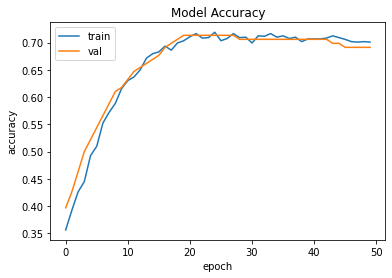

In [ ]:
import keras
from matplotlib import pyplot as plt

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Evaluate the Model


In [ ]:
nlpRobertaPatois = t.pipeline("sentiment-analysis", tokenizer=tokenizer, model=modelRobertaPatois)
resultRobertaPatois = nlpRobertaPatois(test_texts.to_list())
resultsListRobertaPatois = [(x['label'], x['score']) for x in resultRobertaPatois]
labelsRobertaPatois, scoresRobertaPatois = list(zip(*resultsListRobertaPatois))

testResultsDfPatois = posOrNegDf.loc[test_texts.index]

testResultsDfPatois['Sentiment'] = labelsRobertaPatois
testResultsDfPatois['Score'] = scoresRobertaPatois

testResultsDfPatois.head()

,Tweet ID,Text,GoldSentiment,isPatois,Sentiment,Score
1741,1298454406300676103,All now Kamina nuh seh NTH substantial. She's just blaming and bashing !!! #jamaicadebates2020,n,True,LABEL_0,0.551656
1489,1301693889594748928,Look like a Rohan Chung kile dem did thick like dumpling and not Bunting. Fritters kile it seems. #JaDecides2020,n,True,LABEL_1,0.562256
2646,1299187973062303747,If Mark behave suh lazy judge Peter Phillips? #jamaicadebates2020,n,True,LABEL_0,0.692560
710,1299169062711369728,I just wish Mark Golding would speak with a little more authority! It’s a little too lazy for me!#jamaicadebates2020,n,False,LABEL_0,0.658323
604,1298448323045711878,Ion appreciate him bringing up Ms Fearon not like this #jamaicadebates2020,n,False,LABEL_0,0.691265


In [ ]:
testResultsDfPatois

,Tweet ID,Text,GoldSentiment,isPatois,Sentiment,Score
1741,1298454406300676103,All now Kamina nuh seh NTH substantial. She's just blaming and bashing !!! #jamaicadebates2020,n,True,LABEL_0,0.551656
1489,1301693889594748928,Look like a Rohan Chung kile dem did thick like dumpling and not Bunting. Fritters kile it seems. #JaDecides2020,n,True,LABEL_1,0.562256
2646,1299187973062303747,If Mark behave suh lazy judge Peter Phillips? #jamaicadebates2020,n,True,LABEL_0,0.692560
710,1299169062711369728,I just wish Mark Golding would speak with a little more authority! It’s a little too lazy for me!#jamaicadebates2020,n,False,LABEL_0,0.658323
604,1298448323045711878,Ion appreciate him bringing up Ms Fearon not like this #jamaicadebates2020,n,False,LABEL_0,0.691265
...,...,...,...,...,...,...
169,1299883985867288577,"There’s no politics... There’s no debate... Just safety! Wear a condom, wear a mask! #dweetsafe #jamaicadebates2020 #JASL https://t.co/brwsJ5zghL",p,False,LABEL_0,0.804826
1645,1299913194782314496,I’m sorry but due to my “Greater share of household work” I will not be able to support your ideologies... yuh know me ave plate fi wash n the house fi dust #jamaicadebates2020 https://t.co/bFbUzODu7I,n,True,LABEL_0,0.813722
1768,1299900594317000705,"I thought by now PDP woulda dead inna di show, him a gwaan wid a likkle ting man. Fair is fair.\n\n#JADebates2020 #decision2020ja",n,True,LABEL_0,0.789843
2849,1298454232169881600,"So no woman nah guh inna relationship is PNP win, just fi get a home FYI Lisa , men get abuse too by women. #jamaicadebates2020",n,True,LABEL_0,0.631889


In [ ]:

testResultsDfPatois['Sentiment'] = testResultsDfPatois['Sentiment'].apply(renameLabels)

In [ ]:
numberOfTruePositiveTweets = testResultsDfPatois[ (testResultsDfPatois['GoldSentiment'] == 'p') & (testResultsDfPatois['Sentiment'] == 'POSITIVE') & (testResultsDfPatois['isPatois'] == True) ].shape[0]
numberOfTrueNegativeTweets = testResultsDfPatois[ (testResultsDfPatois['GoldSentiment'] == 'n') & (testResultsDfPatois['Sentiment'] == 'NEGATIVE') & (testResultsDfPatois['isPatois'] == True) ].shape[0]
totalUnequivocalGoldLabeledPatoisTweets = testResultsDfPatois[ (testResultsDfPatois['GoldSentiment'] != '-') & (testResultsDfPatois['isPatois'] == True) ].shape[0]

print("PATOIS: # true positive: {}\n# true negative: {}\naccuracy: {:.2f}% of {} tweets".format(numberOfTruePositiveTweets, numberOfTrueNegativeTweets, (numberOfTruePositiveTweets + numberOfTrueNegativeTweets) / totalUnequivocalGoldLabeledPatoisTweets * 100.0, totalUnequivocalGoldLabeledPatoisTweets) )

numberOfTruePositiveTweetsNonPatois = testResultsDfPatois[ (testResultsDfPatois['GoldSentiment'] == 'p') & (testResultsDfPatois['Sentiment'] == 'POSITIVE') & (testResultsDfPatois['isPatois'] == False) ].shape[0]
numberOfTrueNegativeTweetsNonPatois = testResultsDfPatois[ (testResultsDfPatois['GoldSentiment'] == 'n') & (testResultsDfPatois['Sentiment'] == 'NEGATIVE') & (testResultsDfPatois['isPatois'] == False) ].shape[0]
totalUnequivocalGoldLabeledPatoisTweetsNonPatois = testResultsDfPatois[ (testResultsDfPatois['GoldSentiment'] != '-') & (testResultsDfPatois['isPatois'] == False) ].shape[0]

print("\n\nNON-PATOIS: # true positive: {}\n# true negative: {}\naccuracy: {:.2f}% of {} tweets".format(
    numberOfTruePositiveTweetsNonPatois, 
    numberOfTrueNegativeTweetsNonPatois, 
    (numberOfTruePositiveTweetsNonPatois + numberOfTrueNegativeTweetsNonPatois) / totalUnequivocalGoldLabeledPatoisTweetsNonPatois * 100.0, 
    totalUnequivocalGoldLabeledPatoisTweetsNonPatois) )

PATOIS: # true positive: 27
# true negative: 89
accuracy: 64.44% of 180 tweets


NON-PATOIS: # true positive: 39
# true negative: 50
accuracy: 55.97% of 159 tweets


## Generate Sentiments For Tweets


In [ ]:
import json

# Opening JSON file
f = open('/content/drive/My Drive/data/rawdata.json')

# returns JSON object as
# a dictionary
data = json.load(f)
#election_tweets_df 

In [ ]:
election_twitter_df = pd.DataFrame({'Tweet ID': [], 'Text': [], 'Cleaned_Text': []})


tweets = data['tweets']
index = 0
for tweet_key, value in tweets.items():
    #print(tweet_key)
    if 'text' in value.keys():        
        election_twitter_df.at[index,['Tweet ID','Text', 'Cleaned_Text']] = [tweet_key,value['text'], str(helperUtils.cleanText1(value['text']))]
        #print(value['text'])
    index = index + 1



In [ ]:
election_twitter_df

,Tweet ID,Text,Cleaned_Text
0,1299469396864368640,🇯🇲Jamaica: Latest Poll Shows Drop In Andrew Holness’ Favorability Rating And An Increase In The Unfavorability Rating Of Dr. Peter Phillips.\n\nDetails tonight @ 8pm EDT\n#JaVotes #PNP #JLP #AndrewHolness #PeterPhillips #Election2020 https://t.co/qKdwXSt3wE,🇯🇲Jamaica: Latest Poll Shows Drop In Andrew Holness’ Favorability Rating And An Increase In The Unfavorability Rating Of Dr. Peter Phillips.\n\nDetails tonight @ 8pm EDT\n#JaVotes #PNP #JLP #AndrewHolness #PeterPhillips #Election2020 http
1,1299468770440876039,@PositiveOrgJA @Nevpositivemeds @chadmorganesq @VPAJamaica @chrisxharper @TijaniChristian @jamie_chevannes @Petchary @MzSammiMiller @shan_dha Voting is a fundamental process in our democratic system. It is a chance for Jamaicans to have a say in the people who representel them!.\n\n#JaVotes2020,@user @user @user @user @user @user @user @user @user @user Voting is a fundamental process in our democratic system. It is a chance for Jamaicans to have a say in the people who representel them!.\n\n#JaVotes2020
2,1299468723535970305,@vocallywise1 @jlpjamaica They are just wicked and disingenuous,@user @user They are just wicked and disingenuous
3,1299468577737670658,@jayjaybrown97 @jlpjamaica They dont have the skillset to reverse it and create anything more plausible,@user @user They dont have the skillset to reverse it and create anything more plausible
4,1299468212892037120,"@PositiveOrgJA @chadmorganesq @VPAJamaica @chrisxharper @TijaniChristian @jamie_chevannes @Petchary @MzSammiMiller @shan_dha A1. Definitely will be voting, my vote counts, it will help to shape who will form Jamaica's next government!\n\n#JaVotes2020","@user @user @user @user @user @user @user @user @user A1. Definitely will be voting, my vote counts, it will help to shape who will form Jamaica's next government!\n\n#JaVotes2020"
...,...,...,...
41042,1302018465759461378,Thank you for your support my #EastPortland 💚 https://t.co/C0CPdUzvBE,Thank you for your support my #EastPortland 💚 http
41043,1302369542547660802,@kxng_geniuz It would be a amazing move who wouldn't like it 🤣🤣🤣🤣,@user It would be a amazing move who wouldn't like it 🤣🤣🤣🤣
41044,1302344226466922496,Oieee🗣 @Owen05437732 @UncleBarry876 @judzlanimac @sweetjarose @ChrisPinnock1 @jlpjamaica https://t.co/Qb7ul06IsI,Oieee🗣 @user @user @user @user @user @user http
41045,1302353277837889537,"@DavidMc75880030 @tinkabell608 @maryserb17 @DrPeterPhillips @JamaicaPNP Love people that can reason bredda. Maths nah keep inna PNP camp. The PNP popular vote reduce by about 25 percent. JLP spend nuff money but less people vote, it just don't add up, like the wealthy plan.","@user @user @user @user @user Love people that can reason bredda. Maths nah keep inna PNP camp. The PNP popular vote reduce by about 25 percent. JLP spend nuff money but less people vote, it just don't add up, like the wealthy plan."


In [ ]:
nlpRobertaPatois = t.pipeline("sentiment-analysis", tokenizer=tokenizer, model=modelRobertaPatois)
resultRobertaPatois = nlpRobertaPatois(list(election_twitter_df['Text']))
resultsListRobertaPatois = [(x['label'], x['score']) for x in resultRobertaPatois]
labelsRobertaPatois, scoresRobertaPatois = list(zip(*resultsListRobertaPatois))

offcialResultsDfPatois = election_twitter_df.loc[election_twitter_df.Text.index]

offcialResultsDfPatois['Sentiment'] = labelsRobertaPatois
offcialResultsDfPatois['Score'] = scoresRobertaPatois

offcialResultsDfPatois.head()

,Tweet ID,Text,Cleaned_Text,Sentiment,Score
0,1299469396864368640,🇯🇲Jamaica: Latest Poll Shows Drop In Andrew Holness’ Favorability Rating And An Increase In The Unfavorability Rating Of Dr. Peter Phillips.\n\nDetails tonight @ 8pm EDT\n#JaVotes #PNP #JLP #AndrewHolness #PeterPhillips #Election2020 https://t.co/qKdwXSt3wE,🇯🇲Jamaica: Latest Poll Shows Drop In Andrew Holness’ Favorability Rating And An Increase In The Unfavorability Rating Of Dr. Peter Phillips.\n\nDetails tonight @ 8pm EDT\n#JaVotes #PNP #JLP #AndrewHolness #PeterPhillips #Election2020 http,LABEL_0,0.582141
1,1299468770440876039,@PositiveOrgJA @Nevpositivemeds @chadmorganesq @VPAJamaica @chrisxharper @TijaniChristian @jamie_chevannes @Petchary @MzSammiMiller @shan_dha Voting is a fundamental process in our democratic system. It is a chance for Jamaicans to have a say in the people who representel them!.\n\n#JaVotes2020,@user @user @user @user @user @user @user @user @user @user Voting is a fundamental process in our democratic system. It is a chance for Jamaicans to have a say in the people who representel them!.\n\n#JaVotes2020,LABEL_0,0.601706
2,1299468723535970305,@vocallywise1 @jlpjamaica They are just wicked and disingenuous,@user @user They are just wicked and disingenuous,LABEL_0,0.792774
3,1299468577737670658,@jayjaybrown97 @jlpjamaica They dont have the skillset to reverse it and create anything more plausible,@user @user They dont have the skillset to reverse it and create anything more plausible,LABEL_0,0.776306
4,1299468212892037120,"@PositiveOrgJA @chadmorganesq @VPAJamaica @chrisxharper @TijaniChristian @jamie_chevannes @Petchary @MzSammiMiller @shan_dha A1. Definitely will be voting, my vote counts, it will help to shape who will form Jamaica's next government!\n\n#JaVotes2020","@user @user @user @user @user @user @user @user @user A1. Definitely will be voting, my vote counts, it will help to shape who will form Jamaica's next government!\n\n#JaVotes2020",LABEL_0,0.671294


In [ ]:

offcialResultsDfPatois['Sentiment'] = offcialResultsDfPatois['Sentiment'].apply(renameLabels)

In [ ]:
offcialResultsDfPatois.to_csv("election_twitter_with_sentiments.csv")